# Univariate Measures

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


from utils.matrix_utils import build_occurrences, matrix
from univariate.univariate import univariate_measures
from evaluation.global_eval_measures import average_maximum_precision, global_coverage, redundancy

connected to port: 44819


In [2]:
data = build_occurrences(corpus="../../../../data/single_corpus_data/SUD_French-GSD-r2.15/preprocessed_data",
                  patterns="../../patterns_single_corpus/patterns_subject_inversion.txt",
                  grew_config="sud")


X, y, feature_names = matrix(data, max_degree=1, min_feature_occurence=5)
results = univariate_measures(X, y, feature_names)
df_results = pd.DataFrame.from_dict(results, orient="index")

Loading dataset...
Number of occurences of the conclusion: 731 / 23741
Extracting features


## Top 5 rules for each score

In [3]:
df_results[df_results['predicted_class'] == True].sort_values("precision", ascending=False).head(5)

,idx,occs,precision,coverage,mutual_info,chi2,p-value,p_y1_given_feature,predicted_class
node:X:own:rel_shallow=parataxis:insert,111,182.0,1.000000,0.248974,0.027698,5728.891929,0.000000e+00,1.000000,True
node:X:child:PronType=Int,143,113.0,0.707965,0.109439,0.009078,1736.372890,0.000000e+00,0.707965,True
node:X:child:rel_shallow=subj,200,100.0,0.500000,0.068399,0.004544,737.729924,1.868044e-162,0.500000,True
node:X:own:rel_shallow=conj:appos,113,24.0,0.375000,0.012312,0.000672,95.284153,1.649282e-22,0.375000,True
node:X:own:ExtPos=PROPN,76,42.0,0.309524,0.017784,0.000854,109.342927,1.365039e-25,0.309524,True


In [4]:
df_results.sort_values("chi2", ascending=False).head(5)

,idx,occs,precision,coverage,mutual_info,chi2,p-value,p_y1_given_feature,predicted_class
node:X:own:rel_shallow=parataxis:insert,111,182.0,1.000000,0.248974,0.027698,5728.891929,0.000000e+00,1.000000,True
node:X:child:PronType=Int,143,113.0,0.707965,0.109439,0.009078,1736.372890,0.000000e+00,0.707965,True
node:X:child:rel_shallow=subj,200,100.0,0.500000,0.068399,0.004544,737.729924,1.868044e-162,0.500000,True
node:X:parent:VerbForm=Fin,92,2309.0,0.098311,0.310534,0.005637,352.742035,1.071591e-78,0.098311,True
node:X:parent:Mood=Ind,33,2238.0,0.097855,0.299590,0.005369,337.295806,2.476297e-75,0.097855,True


In [5]:
df_results.sort_values("mutual_info", ascending=False).head(5)

,idx,occs,precision,coverage,mutual_info,chi2,p-value,p_y1_given_feature,predicted_class
node:X:own:rel_shallow=parataxis:insert,111,182.0,1.000000,0.248974,0.027698,5728.891929,0.000000e+00,1.000000,True
node:X:child:PronType=Int,143,113.0,0.707965,0.109439,0.009078,1736.372890,0.000000e+00,0.707965,True
node:X:parent:VerbForm=Fin,92,2309.0,0.098311,0.310534,0.005637,352.742035,1.071591e-78,0.098311,True
node:X:own:rel_shallow=root,115,15480.0,0.982817,0.661191,0.005461,96.043837,1.123676e-22,0.017183,False
node:X:parent:Mood=Ind,33,2238.0,0.097855,0.299590,0.005369,337.295806,2.476297e-75,0.097855,True


## Plot top-50 rules and its average

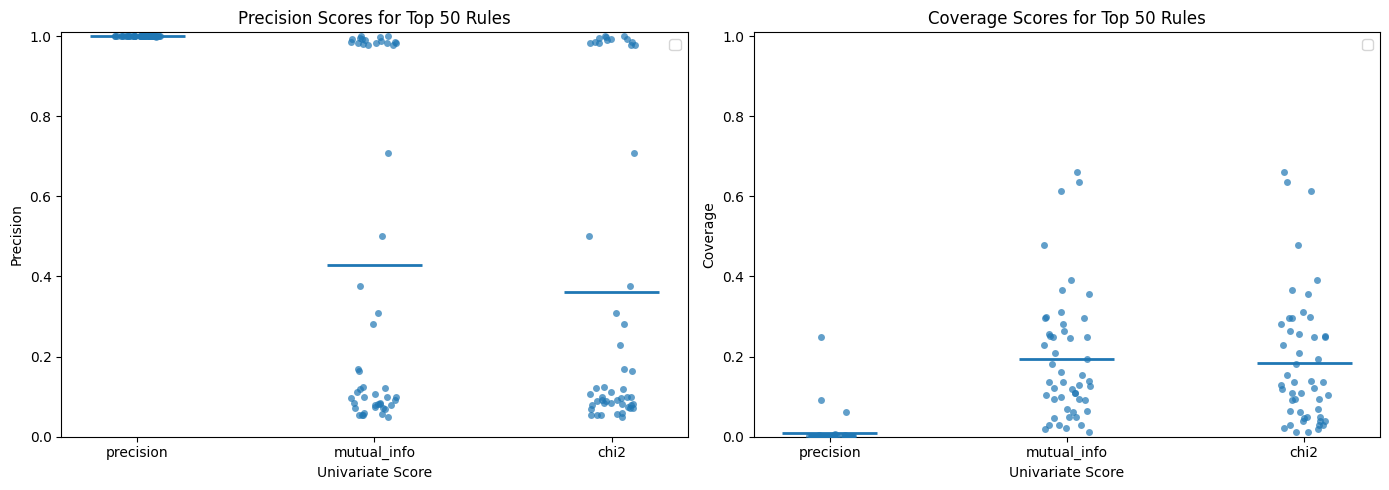

In [6]:
df = pd.DataFrame.from_dict(results, orient="index")
df = df.reset_index().rename(columns={'index': 'name'})

top50_precision = df.sort_values("precision", ascending=False).head(50)
top50_mi = df.sort_values("mutual_info", ascending=False).head(50)
top50_chi2 = df.sort_values("chi2", ascending=False).head(50)

top50_precision_plot = top50_precision.copy()
top50_precision_plot["score"] = "precision"
top50_mi_plot = top50_mi.copy()
top50_mi_plot["score"] = "mutual_info"
top50_chi2_plot = top50_chi2.copy()
top50_chi2_plot["score"] = "chi2"

# concatenate dfs for plotting
df_scatter = pd.concat([top50_precision_plot, top50_mi_plot, top50_chi2_plot], ignore_index=True)

# average per score
avg_df = df_scatter.groupby("score")[["precision", "coverage"]].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.stripplot(data=df_scatter, x="score", y="precision", ax=axes[0], jitter=True, alpha=0.7)

# top 50  precision
# the average on a stripplot
for i, row in avg_df.iterrows():
    x_pos = list(df_scatter["score"].unique()).index(row["score"])
    axes[0].hlines(row["precision"], x_pos-0.2, x_pos+0.2, colors=sns.color_palette(), linewidth=2)

axes[0].set_title("Precision Scores for Top 50 Rules")
axes[0].set_ylabel("Precision")
axes[0].set_xlabel("Univariate Score")
axes[0].set_ylim(0, 1.01)
axes[1].set_ylim(0, 1.01)

# top 50 by coverage
sns.stripplot(data=df_scatter, x="score", y="coverage", ax=axes[1], jitter=True, alpha=0.7)
for i, row in avg_df.iterrows():
    x_pos = list(df_scatter["score"].unique()).index(row["score"])
    axes[1].hlines(row["coverage"], x_pos-0.2, x_pos+0.2, colors=sns.color_palette(), linewidth=2)

axes[1].set_title("Coverage Scores for Top 50 Rules")
axes[1].set_ylabel("Coverage")
axes[1].set_xlabel("Univariate Score")

for ax in axes:
    handles, labels = ax.get_legend_handles_labels()
    xticks = ax.get_xticks()
    xticklabels = [l.get_text() for l in ax.get_xticklabels()]
    ax.set_xticks(xticks[::-1])
    ax.set_xticklabels(xticklabels[::-1])
    ax.legend(handles[::-1], labels[::-1])

plt.tight_layout()
#plt.savefig("univariate_avg_scores.pdf")
plt.show()

## Compute global measures for $n$ rules

In [7]:
n = 100
res = {}
scores = ["precision", "chi2", "mutual_info"]
for score in scores:
    df = pd.DataFrame.from_dict(results, orient="index")
    df = df.reset_index().rename(columns={'index': 'name'})
    df = df.sort_values(score, ascending=False)
    results_by_n = []
    for n in range(1, n + 1, 1):
        selected_indices = df.idx.values[:n]
        selected_signs = [1 if v else 0 for v in df.predicted_class.values[:n]]
        selected_names = df.name.values[:n]
        selected_precisions = df.precision.values[:n]
        selected_coverages = df.coverage.values[:n]

        X_selected = X[:, selected_indices]
        rules = [(X[:, i], sign, score)
            for i, sign, score in zip(selected_indices, selected_signs, selected_precisions)
        ]
        global_coverage_score, uncovered_occs = global_coverage(X_selected, y, selected_signs)
        redudancy_score = redundancy(X_selected)
        amp, pos_amp, neg_amp, rule_zero_amp, (pos_base_precision, neg_base_precision) = average_maximum_precision(rules, y, rule_zero=False)
        avg_lenght = np.mean([len(re.split(r',(?=node|0|1)', name)) for name in selected_names])
        results_by_n.append({
            "n_features": n,
            "global_coverage": global_coverage_score,
            "redundancy": redudancy_score,
            "amp": amp,
            "pos_amp": pos_amp,
            "neg_amp": neg_amp,
            "rule_zero_amp": rule_zero_amp,
            "pos_base_precision": pos_base_precision,
            "neg_base_precision": neg_base_precision,
            "amp_gain": amp - rule_zero_amp,
            "uncovered_occs": uncovered_occs[0],
            "avg_precision": np.mean(selected_precisions),
            "avg_coverage": np.mean(selected_coverages),
            "avg_lenght": avg_lenght
        })

    res[score] = results_by_n

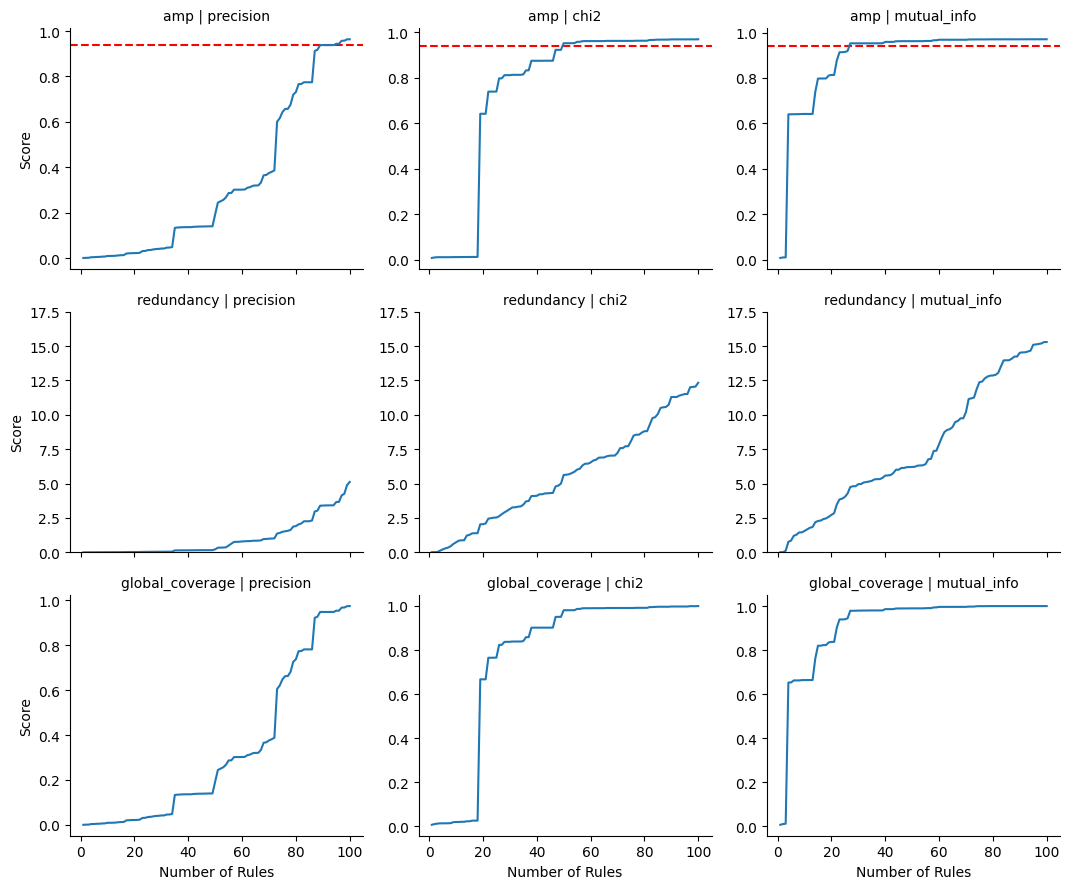

In [8]:
# prepare your data in long format for seaborn
results_by_n_precision = pd.DataFrame(res['precision'])
results_by_n_chi2 = pd.DataFrame(res['chi2'])
results_by_n_mi = pd.DataFrame(res['mutual_info'])
results_by_n_precision['score'] = 'precision'
results_by_n_chi2['score'] = 'chi2'
results_by_n_mi['score'] = 'mutual_info'

df_long = pd.concat([results_by_n_precision, results_by_n_chi2, results_by_n_mi], ignore_index=True)

# melt for plotting in once single plot
df_plot = df_long.melt(id_vars=['n_features', 'score'], 
                      value_vars=['amp', 'redundancy', 'global_coverage'],
                      var_name='metric', value_name='value')

g = sns.FacetGrid(df_plot, row='metric', col='score', sharex=True, sharey=False, height=3, aspect=1.2)
for ax, score in zip(g.axes[0], scores):
    rule_zero = res[score][0]['rule_zero_amp']
    ax.axhline(rule_zero, color='red', linestyle='--', label='rule_zero_amp')

g.map(sns.lineplot, 'n_features', 'value')

redundancy_row_index = g.row_names.index('redundancy')
for ax in g.axes[redundancy_row_index]:
    ax.set_ylim(0, 17.5)

g.set_axis_labels('Number of Rules', 'Score')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.style.use('default')
plt.tight_layout()
#plt.savefig("univariate_global_scores.pdf")
plt.show()


## Find $n$ rules when it first passes the AMP baseline

In [9]:
results_by_n_precision = pd.DataFrame(res['precision'])
results_by_n_chi2 = pd.DataFrame(res['chi2'])
results_by_n_mi = pd.DataFrame(res['mutual_info'])
# Find the first n_features where max_precision exceeds rule_zero_max_precision for each score
first_pass = {}
for score, df in zip(scores, [results_by_n_precision, results_by_n_chi2, results_by_n_mi]):
    threshold = df['rule_zero_amp'].iloc[0]
    above = df[df['amp'] > threshold]
    if not above.empty:
        first_row = above.iloc[0]
        first_pass[score] = {
            'n_features': int(first_row['n_features']),
            'amp': float(first_row['amp']),
            'rule_zero_amp': float(threshold)
        }
    else:
        first_pass[score] = None
first_pass

{'precision': {'n_features': 95,
  'amp': 0.9434992800912725,
  'rule_zero_amp': 0.9403148932101334},
 'chi2': {'n_features': 50,
  'amp': 0.9527034148566623,
  'rule_zero_amp': 0.9403148932101334},
 'mutual_info': {'n_features': 27,
  'amp': 0.9523402274182455,
  'rule_zero_amp': 0.9403148932101334}}

## Univariate measures with feature interaction

In [10]:
pairwise_data = build_occurrences(corpus="../../../../data/single_corpus_data/SUD_French-GSD-r2.15/preprocessed_data",
                  patterns="../../patterns_single_corpus/patterns_subject_inversion.txt",
                  grew_config="sud")


X_pairwise, y_pairwise, feature_names_pairwise = matrix(pairwise_data, max_degree=2, min_feature_occurence=5)
pairwise_results = univariate_measures(X_pairwise, y_pairwise, feature_names_pairwise)

Loading dataset...
Number of occurences of the conclusion: 731 / 23741
Extracting features


In [11]:
pairwise_res = {}
df_pairwise_results = pd.DataFrame.from_dict(pairwise_results, orient="index")
df_pairwise_results = df_pairwise_results.reset_index().rename(columns={'index': 'name'})

scores = ["precision", "chi2", "mutual_info"]
for score in scores:
    df_sorted = df_pairwise_results.sort_values(score, ascending=False).head(1000)
    results_by_n = []
    for n in range(1, len(df_sorted) + 1, 10):
        selected_indices = df_sorted.idx.values[:n]
        selected_signs = [1 if v else 0 for v in df_sorted.predicted_class.values[:n]]
        selected_names = df_sorted.name.values[:n]
        selected_precisions = df_sorted.precision.values[:n]
        selected_coverages = df_sorted.coverage.values[:n]

        X_selected = X_pairwise[:, selected_indices]
        rules = [(X_pairwise[:, i], sign, score)
            for i, sign, score in zip(selected_indices, selected_signs, selected_precisions)
        ]
        global_coverage_score, uncovered_occs = global_coverage(X_selected, y_pairwise, selected_signs)
        redudancy_score = redundancy(X_selected)
        # redudancy_jaccard_score = redundancy_jaccard(X_selected)
        amp, pos_amp, neg_amp, rule_zero_amp, (pos_base_precision, neg_base_precision) = average_maximum_precision(rules, y_pairwise, rule_zero=False)
        avg_lenght = np.mean([len(re.split(r',(?=node|0|1)', name)) for name in selected_names])
        results_by_n.append({
            "n_features": n,
            "global_coverage": global_coverage_score,
            "redundancy": redudancy_score,
            "amp": amp,
            "pos_amp": pos_amp,
            "neg_amp": neg_amp,
            "rule_zero_amp": rule_zero_amp,
            "pos_base_precision": pos_base_precision,
            "neg_base_precision": neg_base_precision,
            "amp_gain": amp - rule_zero_amp,
            "uncovered_occs": uncovered_occs[0],
            "avg_precision": np.mean(selected_precisions),
            "avg_coverage": np.mean(selected_coverages),
            "avg_lenght": avg_lenght
        })
    pairwise_res[score] = results_by_n

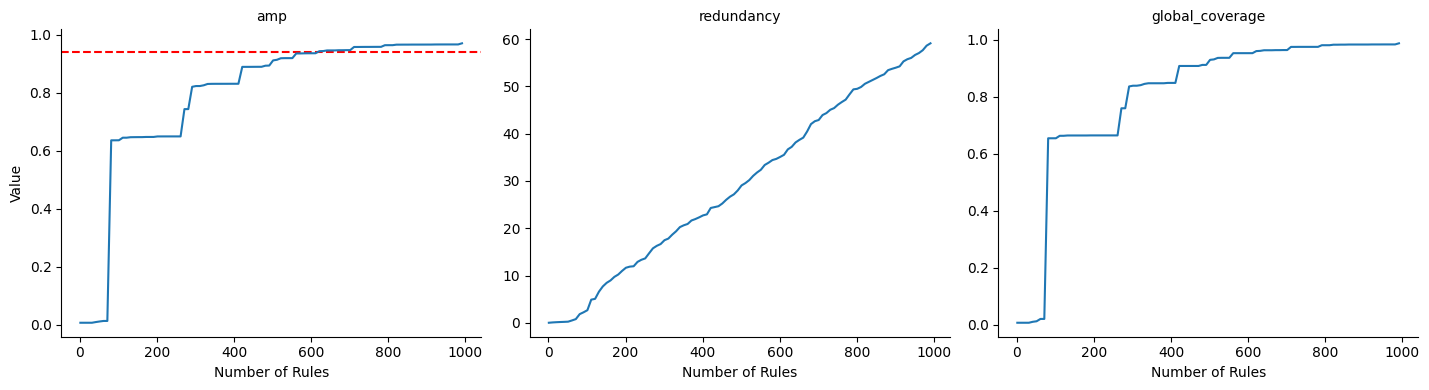

In [12]:
results_by_n_mi = pd.DataFrame(pairwise_res['mutual_info'])
results_by_n_mi['score'] = 'mutual_info'
df_long = pd.concat([results_by_n_mi], ignore_index=True)

# only plot mutual_info: 1 row, 3 columns (one for each metric)
df_plot = results_by_n_mi.melt(
  id_vars=['n_features', 'score'],
  value_vars=['amp', 'redundancy', 'global_coverage'],
  var_name='metric', value_name='value'
)

g = sns.FacetGrid(df_plot, row=None, col='metric', sharex=True, sharey=False, height=4, aspect=1.2)
for ax, metric in zip(g.axes.flat, df_plot['metric'].unique()):
  if metric == 'amp':
    rule_zero = results_by_n_mi['rule_zero_amp'].iloc[0]
    ax.axhline(rule_zero, color='red', linestyle='--', label='rule_zero_amp')

g.map(sns.lineplot, 'n_features', 'value')
g.set_axis_labels('Number of Rules', 'Value')
g.set_titles(col_template='{col_name}')
plt.tight_layout()
#plt.savefig("univariate_selection_pairwise.pdf")
plt.show()

In [13]:
results_by_n_precision = pd.DataFrame(pairwise_res['precision'])
results_by_n_chi2 = pd.DataFrame(pairwise_res['chi2'])
results_by_n_mi = pd.DataFrame(pairwise_res['mutual_info'])
# Find the first n_features where max_precision exceeds rule_zero_max_precision for each score
first_pass = {}
for score, df in zip(scores, [results_by_n_precision, results_by_n_chi2, results_by_n_mi]):
    threshold = df['rule_zero_amp'].iloc[0]
    above = df[df['amp'] > threshold]
    if not above.empty:
        first_row = above.iloc[0]
        first_pass[score] = {
            'n_features': int(first_row['n_features']),
            'amp': float(first_row['amp']),
            'rule_zero_amp': float(threshold),
            'redundancy': float(first_row['redundancy']),
        }
    else:
        first_pass[score] = None
first_pass

{'precision': None,
 'chi2': None,
 'mutual_info': {'n_features': 621,
  'amp': 0.9431431527876689,
  'rule_zero_amp': 0.9403148932101334,
  'redundancy': 36.68059475169538}}